In [6]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision.transforms as transforms
from torchvision.datasets import FashionMNIST
from torch.utils.data import DataLoader, random_split

# MLP Model
class MLP(nn.Module):
    def __init__(self, input_size, hidden_sizes, output_size):
        super(MLP, self).__init__()
        self.network = nn.Sequential(
            nn.Linear(input_size, hidden_sizes[0]),
            nn.ReLU(),
            nn.Linear(hidden_sizes[0], hidden_sizes[1]),
            nn.ReLU(),
            nn.Linear(hidden_sizes[1], output_size),
            nn.Softmax(dim=1)
        )
    
    def forward(self, x):
        x = x.view(x.size(0), -1)  # Flatten the images for MLP
        return self.network(x)
    
dataset = FashionMNIST(root='.', train=True, transform=transforms.ToTensor(), download=True)    
input_size = 28*28
input_channels = 1

hidden_sizes = [512, 256]  # Larger network for CIFAR10
output_size = 10

train_size = int(0.9 * len(dataset))
val_size = len(dataset) - train_size
train_dataset, val_dataset = random_split(dataset, [train_size, val_size])

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False)

# Model, Loss, and Optimizer

model = MLP(input_size, hidden_sizes, output_size)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Training and Validation Loop
num_epochs = 50
for epoch in range(num_epochs):
    model.train()
    total_train_loss = 0
    for images, labels in train_loader:
        outputs = model(images)
        loss = criterion(outputs, labels)
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        total_train_loss += loss.item()

    model.eval()
    total_val_loss = 0
    with torch.no_grad():
        for images, labels in val_loader:
            outputs = model(images)
            loss = criterion(outputs, labels)
            total_val_loss += loss.item()

    print(f'Epoch {epoch+1}, Training Loss: {total_train_loss/len(train_loader)}, Validation Loss: {total_val_loss/len(val_loader)}')

Epoch 1, Training Loss: 1.7161514362170234, Validation Loss: 1.6424146554571517
Epoch 2, Training Loss: 1.6456227955801228, Validation Loss: 1.6269554787493767
Epoch 3, Training Loss: 1.6304906726730943, Validation Loss: 1.6310353222045493
Epoch 4, Training Loss: 1.6278845678432292, Validation Loss: 1.6168182270323976
Epoch 5, Training Loss: 1.6259853366003216, Validation Loss: 1.616250845980137
Epoch 6, Training Loss: 1.62566322674401, Validation Loss: 1.6203633711693135
Epoch 7, Training Loss: 1.6252784004426115, Validation Loss: 1.6214297096780006
Epoch 8, Training Loss: 1.6178361810214146, Validation Loss: 1.6229157048337004
Epoch 9, Training Loss: 1.6156261148045978, Validation Loss: 1.6112680397135146
Epoch 10, Training Loss: 1.6169015864060388, Validation Loss: 1.6084108663366197
Epoch 11, Training Loss: 1.6173278889243636, Validation Loss: 1.6014059509368652
Epoch 12, Training Loss: 1.6157255270187323, Validation Loss: 1.6152091952080423
Epoch 13, Training Loss: 1.6218951046466

Files already downloaded and verified


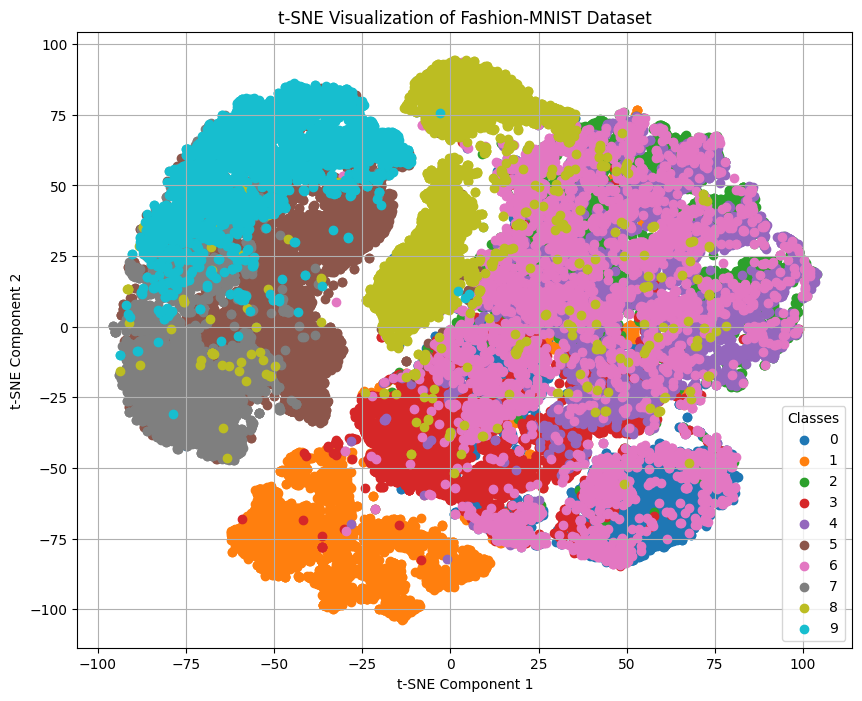

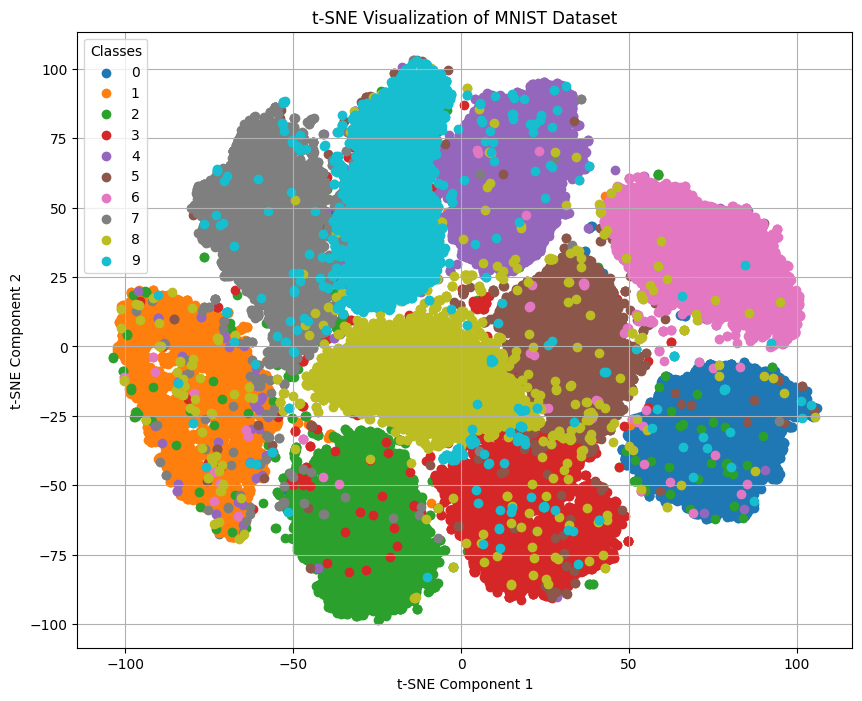

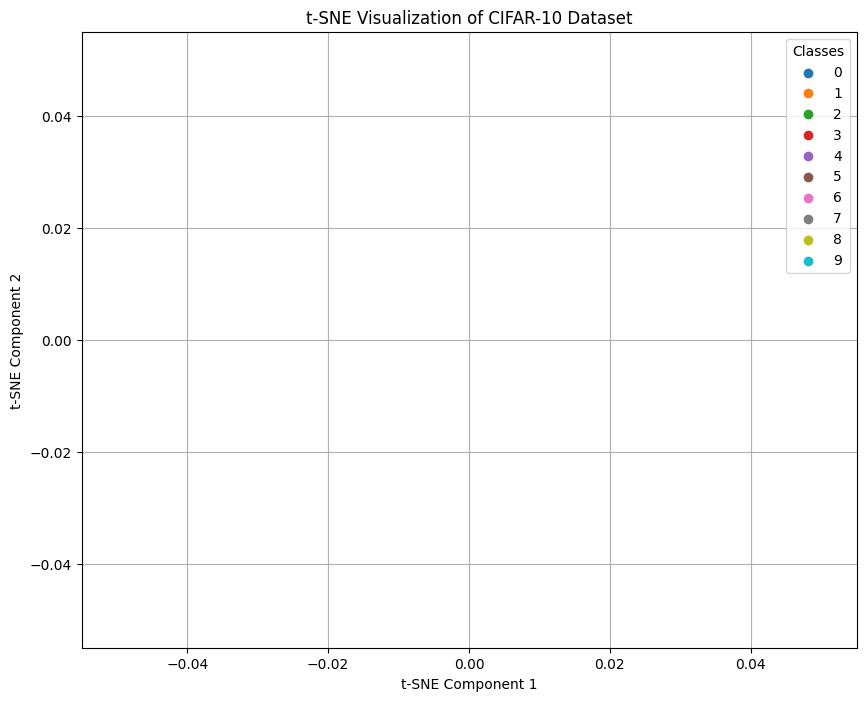

In [2]:
import torch
from torchvision.datasets import FashionMNIST
from torchvision.datasets import MNIST
from torchvision.datasets import CIFAR10
import torchvision.transforms as transforms
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

# transform function for CIFAR-10 dataset
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

# Load the datasets
fashion_mnist_train = FashionMNIST(root='.', train=True, transform=transforms.ToTensor(), download=True)
mnist_train = MNIST(root='.', train=True, transform=transforms.ToTensor(), download=True)
cifar10_train = CIFAR10(root='.', train=True, transform=transform, download=True)

def perform_tsne(dataset, name, input_size, isCIFAR):
    if isCIFAR:
        images = dataset.data.reshape((-1, input_size*input_size*3)).astype(float)
    else:
        # Extract images and labels
        images = dataset.data.reshape((-1, input_size*input_size))
    
    labels = dataset.targets

    # Reduce dimensionality with t-SNE
    tsne = TSNE(n_components=2, random_state=42)
    tsne_results = tsne.fit_transform(images)

    # Visualize the t-SNE results
    plt.figure(figsize=(10, 8))
    for i in range(10):  # Plot each digit class separately
        indices = labels == i
        plt.scatter(tsne_results[indices, 0], tsne_results[indices, 1], label=str(i))
    plt.title('t-SNE Visualization of ' + name + ' Dataset')
    plt.xlabel('t-SNE Component 1')
    plt.ylabel('t-SNE Component 2')
    plt.legend(title='Classes')
    plt.grid(True)
    plt.show()

perform_tsne(fashion_mnist_train, "Fashion-MNIST", 28, False)
perform_tsne(mnist_train, "MNIST", 28, False)
perform_tsne(cifar10_train, "CIFAR-10", 32, True)


In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision.transforms as transforms
from torchvision.datasets import FashionMNIST
from torch.utils.data import DataLoader, random_split

class LeNet(nn.Module):
    def __init__(self, input_channels=1):
        super(LeNet, self).__init__()
        self.cnn_model = nn.Sequential(
            nn.Conv2d(1, 6, kernel_size=5, padding=2),  # Use padding=2 to keep dimension 28x28
            nn.ReLU(),
            nn.MaxPool2d(2, stride=2),  # Output size: 14x14
            nn.Conv2d(6, 16, kernel_size=5, padding=0),  # Output size: 10x10 (no padding)
            nn.ReLU(),
            nn.MaxPool2d(2, stride=2)  # Output size: 5x5
        )
        self.fc_model = nn.Sequential(
            nn.Linear(16 * 5 * 5, 120),
            nn.ReLU(),
            nn.Linear(120, 84),
            nn.ReLU(),
            nn.Linear(84, 10)
        )
        
    def forward(self, x):
        x = self.cnn_model(x)
        x = x.view(x.size(0), -1)  # Flatten the output
        return self.fc_model(x)

dataset = FashionMNIST(root='.', train=True, transform=transforms.ToTensor(), download=True)
input_size = 28*28
input_channels = 1

hidden_sizes = [512, 256]  # Larger network for CIFAR10
output_size = 10

train_size = int(0.9 * len(dataset))
val_size = len(dataset) - train_size
train_dataset, val_dataset = random_split(dataset, [train_size, val_size])

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False)

# Model, Loss, and Optimizer
model = LeNet(input_channels)

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Training and Validation Loop
num_epochs = 50
for epoch in range(num_epochs):
    model.train()
    total_train_loss = 0
    for images, labels in train_loader:
        outputs = model(images)
        loss = criterion(outputs, labels)
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        total_train_loss += loss.item()

    model.eval()
    total_val_loss = 0
    with torch.no_grad():
        for images, labels in val_loader:
            outputs = model(images)
            loss = criterion(outputs, labels)
            total_val_loss += loss.item()

    print(f'Epoch {epoch+1}, Training Loss: {total_train_loss/len(train_loader)}, Validation Loss: {total_val_loss/len(val_loader)}')
    

In [6]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision.transforms as transforms
from torchvision.datasets import FashionMNIST
from torch.utils.data import DataLoader, random_split

class FlexNet(nn.Module):
    def __init__(self, input_channels=1):
        super(FlexNet, self).__init__()
        self.conv_layers = nn.Sequential(
            nn.Conv2d(input_channels, 32, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.Conv2d(32, 64, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2, 2),
            nn.BatchNorm2d(64),
            nn.Conv2d(64, 128, kernel_size=3, padding=2, dilation=2),
            nn.ReLU(),
            nn.Conv2d(128, 128, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2, 2),
            nn.BatchNorm2d(128)
        )
        self.fc_layers = nn.Sequential(
            nn.Flatten(),
            nn.Linear(128 * 7 * 7, 512),
            nn.ReLU(),
            nn.Dropout(0.5),
            nn.Linear(512, 256),
            nn.ReLU(),
            nn.Dropout(0.5),
            nn.Linear(256, 10),
            nn.LogSoftmax(dim=1)
        )

    def forward(self, x):
        x = self.conv_layers(x)
        x = self.fc_layers(x)
        return x

def train_model(dataset_class, input_channels):
    transform = transforms.Compose([
        transforms.ToTensor(),
        transforms.Normalize((0.5,), (0.5,))
    ])
    dataset = dataset_class(root='.', train=True, download=True, transform=transform)
    train_size = int(0.9 * len(dataset))
    val_size = len(dataset) - train_size
    train_dataset, val_dataset = random_split(dataset, [train_size, val_size])
    train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
    val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False)

    model = FlexNet(input_channels=input_channels)
    print(model)
    criterion = nn.NLLLoss()
    optimizer = optim.Adam(model.parameters(), lr=0.001)

    num_epochs = 50
    for epoch in range(num_epochs):
        total_train_loss = 0
        total_val_loss = 0
        model.train()
        for images, labels in train_loader:
            optimizer.zero_grad()
            outputs = model(images)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            total_train_loss += loss.item()

        model.eval()
        with torch.no_grad():
            for images, labels in val_loader:
                outputs = model(images)
                loss = criterion(outputs, labels)
                total_val_loss += loss.item()

        print(f'Epoch {epoch+1}: Training Loss: {total_train_loss / len(train_loader)}, Validation Loss: {total_val_loss / len(val_loader)}')

train_model(FashionMNIST, 1)

100.0%


Extracting .\FashionMNIST\raw\train-images-idx3-ubyte.gz to .\FashionMNIST\raw



100.0%


Extracting .\FashionMNIST\raw\train-labels-idx1-ubyte.gz to .\FashionMNIST\raw



100.0%


Extracting .\FashionMNIST\raw\t10k-images-idx3-ubyte.gz to .\FashionMNIST\raw



100.0%


Extracting .\FashionMNIST\raw\t10k-labels-idx1-ubyte.gz to .\FashionMNIST\raw

FlexNet(
  (conv_layers): Sequential(
    (0): Conv2d(1, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (6): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(2, 2), dilation=(2, 2))
    (7): ReLU()
    (8): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU()
    (10): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (11): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  )
  (fc_layers): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=6272, out_features=512, bias=True)
    (2): ReLU()

KeyboardInterrupt: 

In [5]:
%pip install torchvision

     ---------------------------------------- 0.0/61.0 kB ? eta -:--:--
     ---------------------------------------- 0.0/61.0 kB ? eta -:--:--
     ------ --------------------------------- 10.2/61.0 kB ? eta -:--:--
     ------ --------------------------------- 10.2/61.0 kB ? eta -:--:--
     ------------------- ------------------ 30.7/61.0 kB 259.2 kB/s eta 0:00:01
     ------------------- ------------------ 30.7/61.0 kB 259.2 kB/s eta 0:00:01
     ------------------------- ------------ 41.0/61.0 kB 163.4 kB/s eta 0:00:01
     ------------------------- ------------ 41.0/61.0 kB 163.4 kB/s eta 0:00:01
     -------------------------------------- 61.0/61.0 kB 203.2 kB/s eta 0:00:00
   ---------------------------------------- 0.0/1.2 MB ? eta -:--:--
   - -------------------------------------- 0.0/1.2 MB 1.3 MB/s eta 0:00:01
   -- ------------------------------------- 0.1/1.2 MB 787.7 kB/s eta 0:00:02
   --- ------------------------------------ 0.1/1.2 MB 871.5 kB/s eta 0:00:02
   --- --

  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
